In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
%matplotlib inline

## Get the data

In [54]:
df = pd.read_csv('../../../datasets/parte1/weatherAUS.csv')

In [55]:
df.columns
df.shape

(145460, 23)

In [56]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [76]:
for column in df.select_dtypes(include=['object']).columns:
    unique_values_count = df[column].value_counts()
    print(f"Column: {column}\n{unique_values_count}\n")

Column: Date
Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64

Column: Location
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
Per

In [58]:
print(df.describe())

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

In [59]:
print(df.isna().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

<Axes: xlabel='Temp3pm', ylabel='Count'>

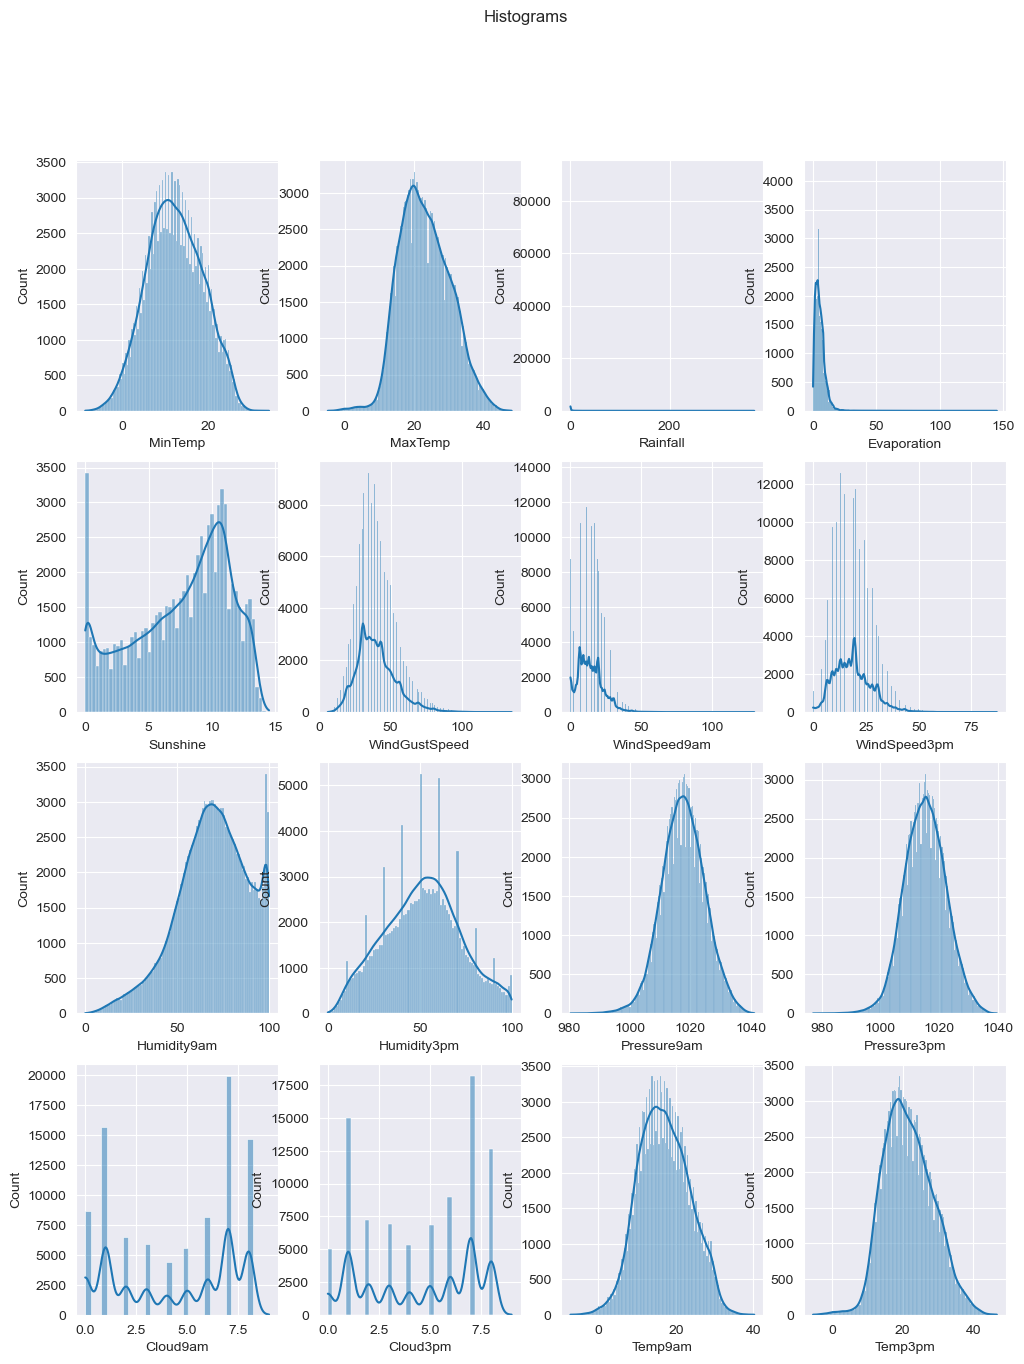

In [60]:
fig, axs = plt.subplots(4, 4, figsize=(12, 15))
fig.suptitle("Histograms")

sns.histplot(df["MinTemp"], ax=axs[0,0], kde=True)
sns.histplot(df["MaxTemp"], ax=axs[0,1], kde=True)
sns.histplot(df["Rainfall"], ax=axs[0,2], kde=True)
sns.histplot(df["Evaporation"], ax=axs[0,3], kde=True)
sns.histplot(df["Sunshine"], ax=axs[1,0], kde=True)
sns.histplot(df["WindGustSpeed"], ax=axs[1,1], kde=True)
sns.histplot(df["WindSpeed9am"], ax=axs[1,2], kde=True)
sns.histplot(df["WindSpeed3pm"], ax=axs[1,3], kde=True)
sns.histplot(df["Humidity9am"], ax=axs[2,0], kde=True)
sns.histplot(df["Humidity3pm"], ax=axs[2,1], kde=True)
sns.histplot(df["Pressure9am"], ax=axs[2,2], kde=True)
sns.histplot(df["Pressure3pm"], ax=axs[2,3], kde=True)
sns.histplot(df["Cloud9am"], ax=axs[3,0], kde=True)
sns.histplot(df["Cloud3pm"], ax=axs[3,1], kde=True)
sns.histplot(df["Temp9am"], ax=axs[3,2], kde=True)
sns.histplot(df["Temp3pm"], ax=axs[3,3], kde=True)

In [61]:
df_copy = df.copy()
replace_map = {"RainToday": {"Yes": 1, "No": 0}}
labels = df_copy["RainToday"].astype('category').cat.categories.tolist()
replace_map_comp = {'RainToday' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_copy.replace(replace_map_comp, inplace=True)

replace_map = {"RainTomorrow": {"Yes": 1, "No": 0}}
labels = df_copy["RainTomorrow"].astype('category').cat.categories.tolist()
replace_map_comp = {'RainTomorrow' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_copy.replace(replace_map_comp, inplace=True)

<Axes: >

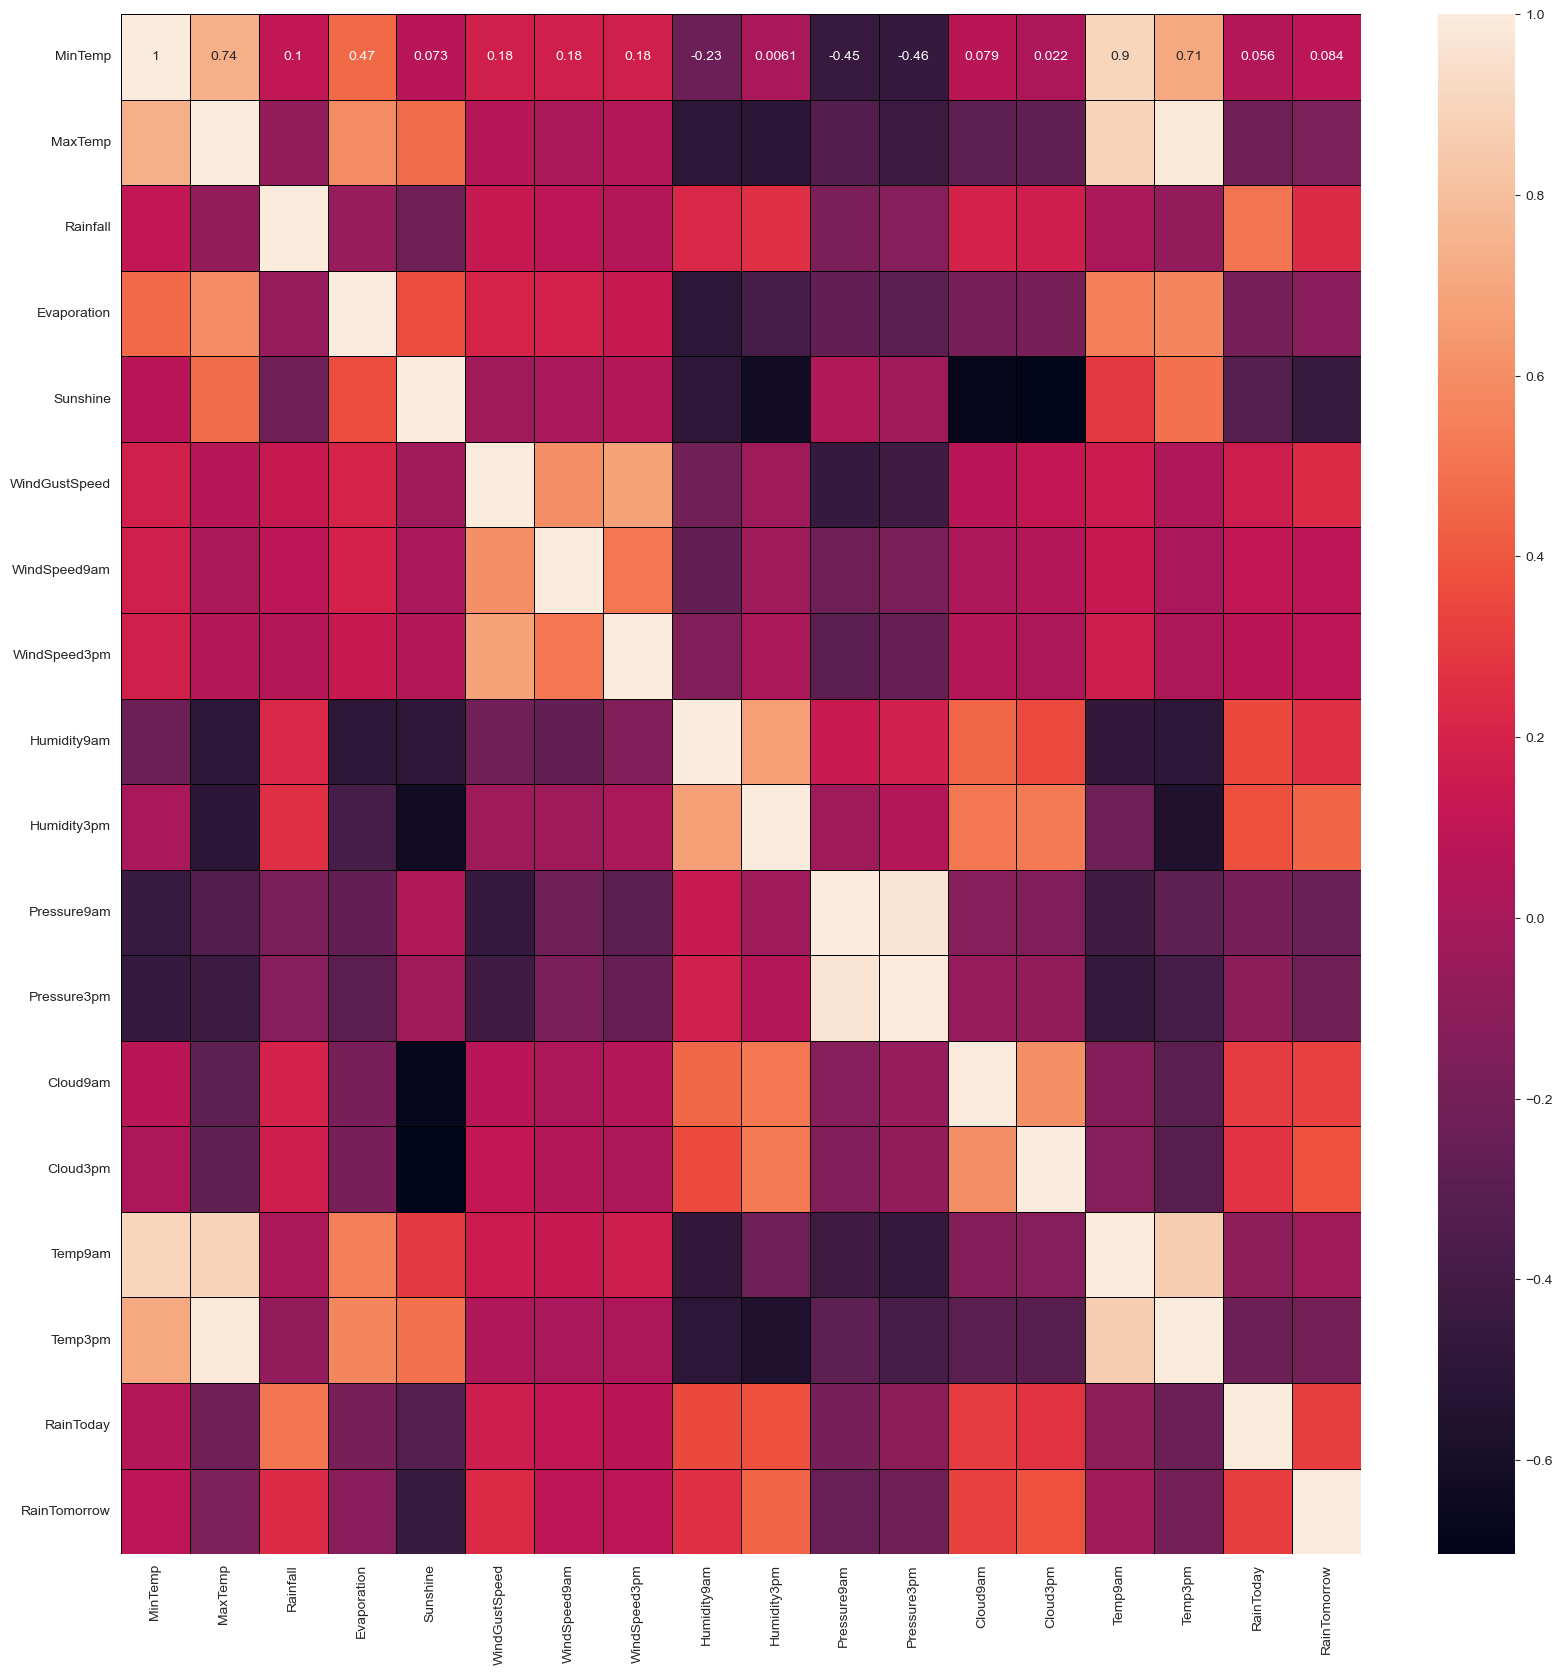

In [62]:
fig = plt.figure(figsize=(20, 20))
satisfaction_corr = df_copy.corr(method='pearson', numeric_only=True)
sns.heatmap(satisfaction_corr, linecolor='black', linewidths=0.5, annot=True)

/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


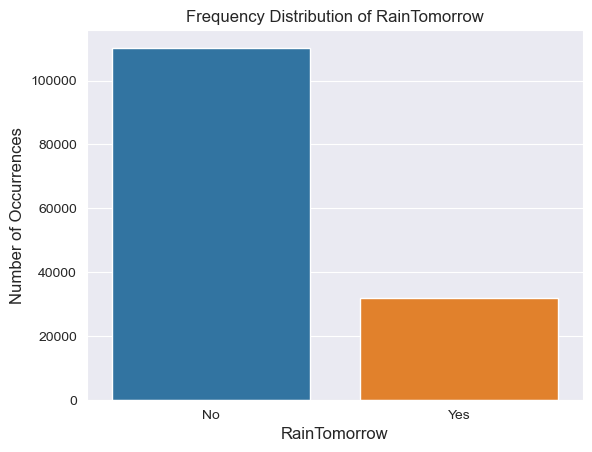

In [63]:
raintomorrow_count = df['RainTomorrow'].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=raintomorrow_count.index, y=raintomorrow_count.values)
plt.title('Frequency Distribution of RainTomorrow')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('RainTomorrow', fontsize=12)
plt.show()

/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


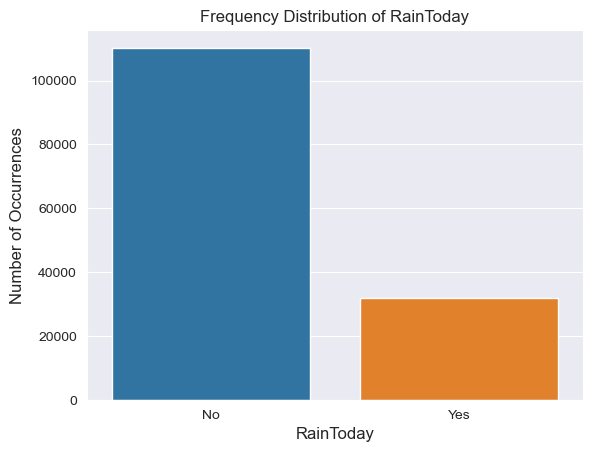

In [64]:
raintoday_count = df['RainToday'].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=raintoday_count.index, y=raintoday_count.values)
plt.title('Frequency Distribution of RainToday')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('RainToday', fontsize=12)
plt.show()

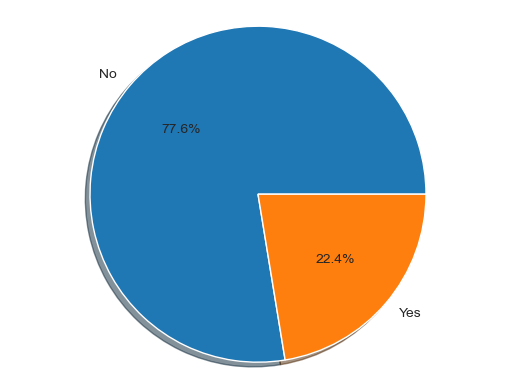

In [65]:
labels = df['RainTomorrow'].astype('category').cat.categories.tolist()
counts = df['RainTomorrow'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

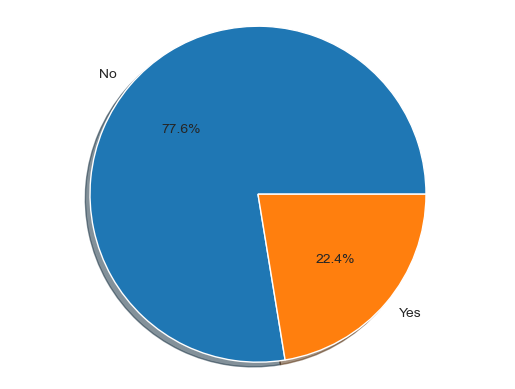

In [66]:
labels = df['RainToday'].astype('category').cat.categories.tolist()
counts = df['RainToday'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

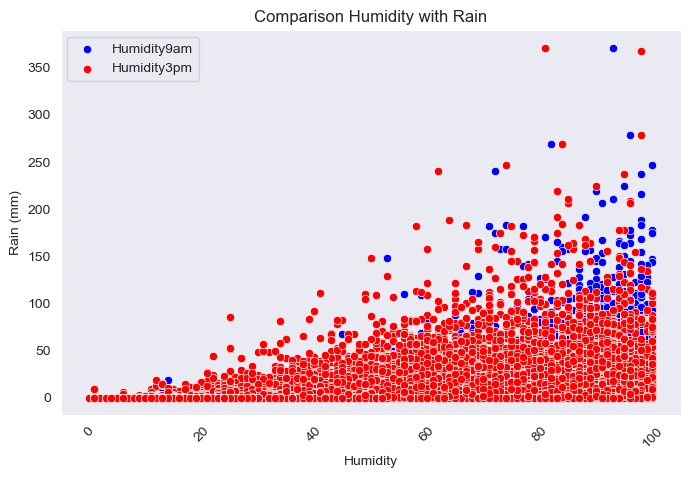

In [67]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Humidity9am'], y=df['Rainfall'], color="blue", label='Humidity9am')
sns.scatterplot(x=df['Humidity3pm'], y=df['Rainfall'], color="red", label='Humidity3pm')
plt.title("Comparison Humidity with Rain")
plt.xlabel('Humidity')
plt.ylabel('Rain (mm)')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid()
plt.show()

/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


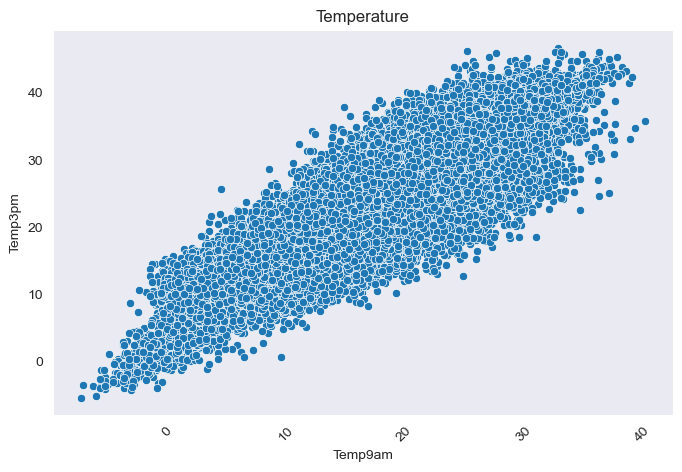

In [68]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Temp9am'], y=df['Temp3pm'])
plt.title("Temperature")
plt.xlabel('Temp9am')
plt.ylabel('Temp3pm')
plt.xticks(rotation=45)
plt.grid()
plt.show()

/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


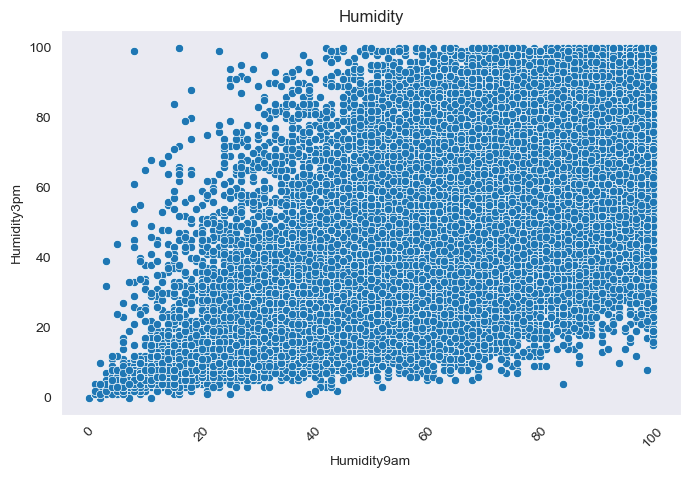

In [69]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Humidity9am'], y=df['Humidity3pm'])
plt.title("Humidity")
plt.xlabel('Humidity9am')
plt.ylabel('Humidity3pm')
plt.xticks(rotation=45)
plt.grid()
plt.show()

/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


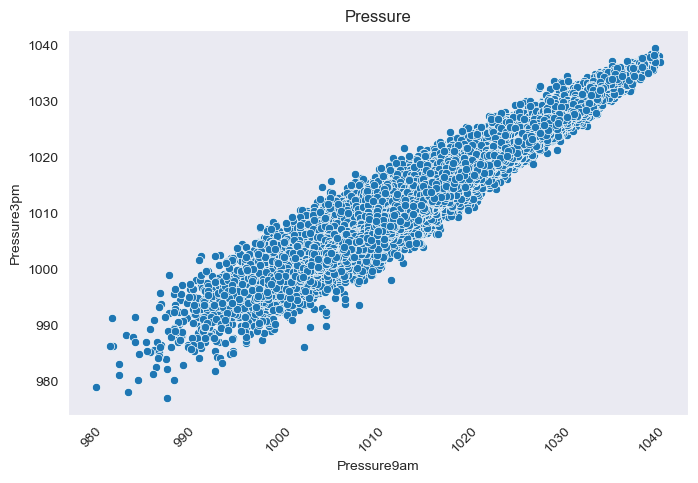

In [70]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Pressure9am'], y=df['Pressure3pm'])
plt.title("Pressure")
plt.xlabel('Pressure9am')
plt.ylabel('Pressure3pm')
plt.xticks(rotation=45)
plt.grid()
plt.show()

/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

<Axes: ylabel='Temp3pm'>

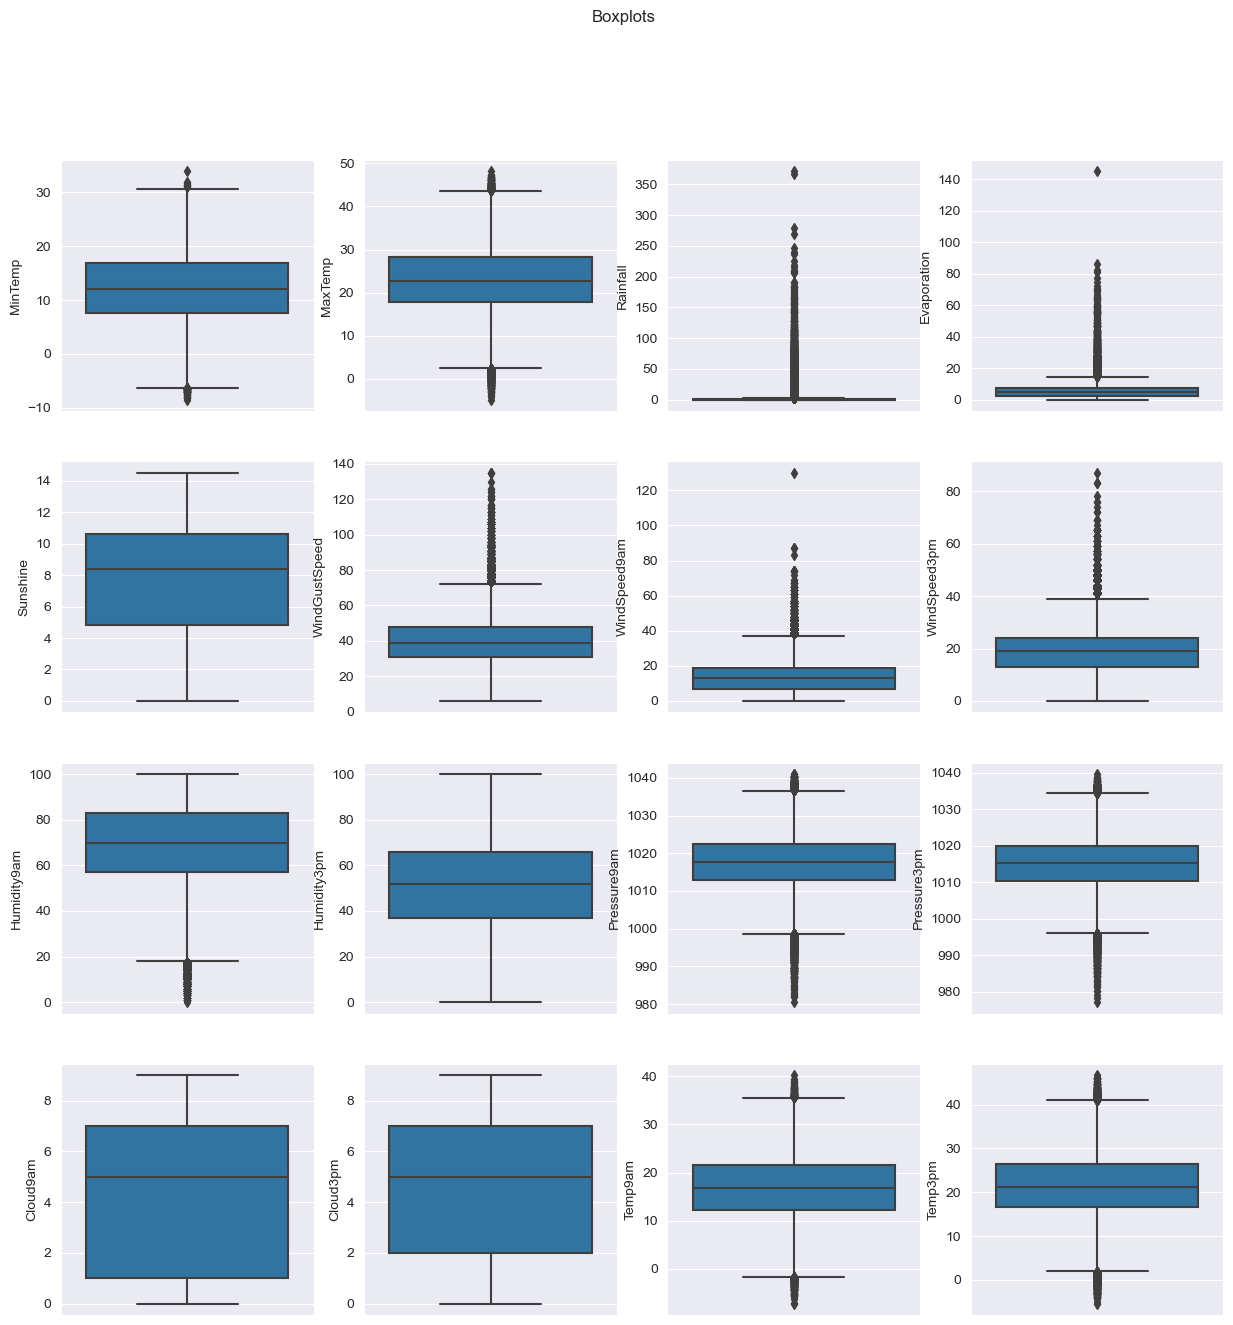

In [71]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
fig.suptitle("Boxplots")

sns.boxplot(y=df["MinTemp"], ax=axs[0,0])
sns.boxplot(y=df["MaxTemp"], ax=axs[0,1])
sns.boxplot(y=df["Rainfall"], ax=axs[0,2])
sns.boxplot(y=df["Evaporation"], ax=axs[0,3])
sns.boxplot(y=df["Sunshine"], ax=axs[1,0])
sns.boxplot(y=df["WindGustSpeed"], ax=axs[1,1])
sns.boxplot(y=df["WindSpeed9am"], ax=axs[1,2])
sns.boxplot(y=df["WindSpeed3pm"], ax=axs[1,3])
sns.boxplot(y=df["Humidity9am"], ax=axs[2,0])
sns.boxplot(y=df["Humidity3pm"], ax=axs[2,1])
sns.boxplot(y=df["Pressure9am"], ax=axs[2,2])
sns.boxplot(y=df["Pressure3pm"], ax=axs[2,3])
sns.boxplot(y=df["Cloud9am"], ax=axs[3,0])
sns.boxplot(y=df["Cloud3pm"], ax=axs[3,1])
sns.boxplot(y=df["Temp9am"], ax=axs[3,2])
sns.boxplot(y=df["Temp3pm"], ax=axs[3,3])

In [72]:
#sns.pairplot(df, hue="RainTomorrow")

In [73]:
#sns.pairplot(df, hue="RainToday")